<a href="https://colab.research.google.com/github/tymepas/RegEx_Python/blob/main/Assignment_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_tracks = pd.read_csv('tracks.csv')
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [4]:
# Check Null Values

pd.isnull(df_tracks).sum()

id                  0
name                1
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             1
tempo               1
time_signature      1
dtype: int64

In [5]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245117 entries, 0 to 245116
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                245117 non-null  object 
 1   name              245116 non-null  object 
 2   popularity        245117 non-null  int64  
 3   duration_ms       245117 non-null  int64  
 4   explicit          245117 non-null  int64  
 5   artists           245117 non-null  object 
 6   id_artists        245117 non-null  object 
 7   release_date      245117 non-null  object 
 8   danceability      245117 non-null  float64
 9   energy            245117 non-null  float64
 10  key               245117 non-null  int64  
 11  loudness          245117 non-null  float64
 12  mode              245117 non-null  int64  
 13  speechiness       245117 non-null  float64
 14  acousticness      245117 non-null  float64
 15  instrumentalness  245117 non-null  float64
 16  liveness          24

In [6]:
# check the least popular tracks on spotify

sorted_df = df_tracks.sort_values('popularity', ascending = True).head(10)
sorted_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
122558,4BszABgWhJECV6A235iuJL,"Violin Concerto No. 1 in G Minor, Op. 26: III....",0,400573,0,"['Max Bruch', 'Pierre Monteux', 'Yehudi Menuhin']","['0521x50ZcNqqT1fKMJg5c5', '5fL4LVKRLKkyN1Xalp...",1945,0.394,0.350,2,-10.405,1,0.0397,0.976000,0.434000,0.2430,0.600,99.678,4.0
157069,34moIAbdISpjASW8ugH5ms,New Years Day - Original Mix,0,343125,0,"['Trasko', 'Robert Fulton']","['2xt7FjpoX6FLx7KbZjjVIL', '1iiMVo3DfAiHDfIM47...",2013-06-21,0.675,0.918,4,-3.304,0,0.0457,0.101000,0.911000,0.1050,0.129,128.003,4.0
156952,39YsjYzBYqtF7355pKYj9Z,Skinner - Extended Version,0,278044,0,['TNT'],['1CqOLQmjzVWXQTiIN5Wucs'],2013-12-15,0.454,0.999,10,-1.599,1,0.0712,0.007430,0.860000,0.0548,0.381,150.030,4.0
156858,4u0fZIxl32m5x9QeCVOtaa,Leap Year Song,0,130847,0,['Song a Day'],['4O4Rkb6K3ppeXyVvD6zBJA'],2012-01-01,0.692,0.462,2,-11.217,1,0.0341,0.657000,0.000001,0.1390,0.859,97.467,4.0
156851,1UrAU7tXR3fFvpFsXNLmcU,New Year,0,224261,0,['Jamieson Webster'],['0ZS0XtMtou2yKaYiKijnI7'],2020-12-16,0.720,0.811,10,-7.900,1,0.0605,0.015400,0.000074,0.3490,0.655,120.032,4.0
156848,0fvM2BxiIz7m5EeAiwyZkC,Halfway to Sidari - Reelaux 2012 rework,0,411148,0,['Reelaux'],['0K29QSgYQBz9jtp1xpiFft'],2013-05-13,0.801,0.664,2,-7.915,1,0.0713,0.006990,0.907000,0.0631,0.332,121.999,4.0
156846,2oXvCz2f9He8V12sk5HH4E,2012 the Vision - Extended,0,377574,0,['The Produxer'],['2MRsBasAWwIdETnOeuZe5H'],2013-11-30,0.787,0.856,6,-6.529,1,0.3410,0.025500,0.000002,0.0868,0.756,127.979,4.0
156843,4g4PCR5lprSwA1HU2AMgHB,2012 (If the World Would End),0,175856,0,['Cover Masters'],['40qo7BOa9aNV0eS44OtNxI'],2012-12-14,0.728,0.908,9,-3.350,1,0.0766,0.249000,0.000000,0.2230,0.637,128.000,4.0
156839,4rYNJiEoOFDKJTCzKFaYUz,Dirty Go-Getter Blues (2012),0,300069,0,['Adam Gardner'],['7GbMHSUkqSEF3eeL4x7Nuy'],2015-12-16,0.553,0.174,3,-19.212,1,0.0432,0.897000,0.000138,0.0965,0.452,139.849,4.0
155191,176zlW24gfGNSqnT3mwILD,Jingle,0,194325,0,['Smoke Ring'],['0aZwptQmFtMPziBITkF3le'],2017-09-22,0.282,0.831,9,-7.583,1,0.0993,0.000888,0.002410,0.0353,0.568,171.846,3.0


In [7]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,245117.0,27.971169,20.826845,0.0,8.0000,28.000000,43.00000,100.000
duration_ms,245117.0,231552.276652,134513.923702,3344.0,171960.0000,210987.000000,264280.00000,5042185.000
explicit,245117.0,0.036946,0.188629,0.0,0.0000,0.000000,0.00000,1.000
danceability,245117.0,0.556470,0.170178,0.0,0.4410,0.571000,0.68300,0.988
energy,245117.0,0.516583,0.259229,0.0,0.3040,0.518000,0.72900,1.000
key,245117.0,5.211878,3.516231,0.0,2.0000,5.000000,8.00000,11.000
loudness,245117.0,-10.766270,5.318319,-60.0,-13.6230,-9.838000,-6.82300,5.109
mode,245117.0,0.670451,0.470050,0.0,0.0000,1.000000,1.00000,1.000
speechiness,245117.0,0.097127,0.168607,0.0,0.0344,0.044200,0.07170,0.970
acousticness,245117.0,0.482482,0.361665,0.0,0.1070,0.483000,0.84100,0.996


In [8]:
# Check the 10 most popular songs which popularity are greater than 90

most_popular = df_tracks.query('popularity>90', inplace = False).sort_values('popularity', ascending=False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4.0
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4.0
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4.0
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4.0
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4.0
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4.0
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4.0
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4.0
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3.0


In [9]:
df_tracks.set_index('release_date', inplace=True)
df_tracks.index=pd.to_datetime(df_tracks.index)
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [10]:
# How to filter only specific rows of informations

df_tracks[['artists']].iloc[18]

artists    ['Victor Boucher']
Name: 1922-01-01 00:00:00, dtype: object

In [11]:
# change the durantion m/s into seconds

df_tracks['duration']=df_tracks['duration_ms'].apply(lambda x: round(x/1000))
df_tracks.drop('duration_ms', inplace=True, axis=1)

In [12]:
df_tracks.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

Text(0.5, 1.0, 'Correlation HeatMap Between Variable')

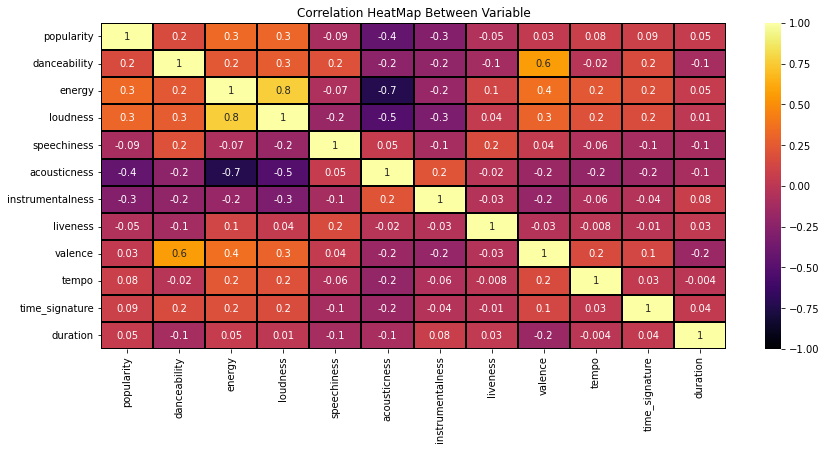

In [14]:
corr_df = df_tracks.drop(["key","mode","explicit"], axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor="Black")
heatmap.set_title("Correlation HeatMap Between Variable")
#heatmap.set_xticklabels(heatmap.get_xticklables(), rotation=90)

In [15]:
sample_df= df_tracks.sample(int(0.004*len(df_tracks)))

In [16]:
print(len(sample_df))

980


[Text(0.5, 1.0, 'Loudness Vs Energy Correlation')]

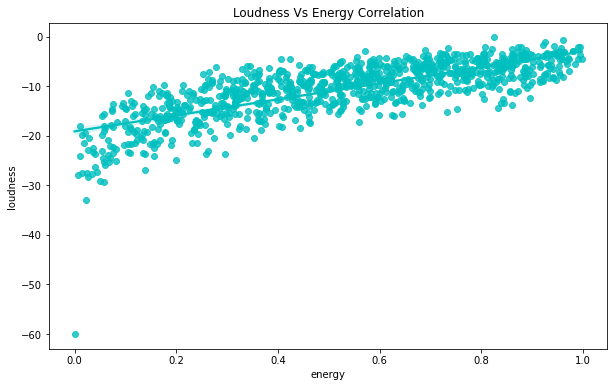

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y='loudness', x='energy', color='c').set(title = 'Loudness Vs Energy Correlation')

[Text(0.5, 1.0, 'Popularity Vs Acousticness Correlation')]

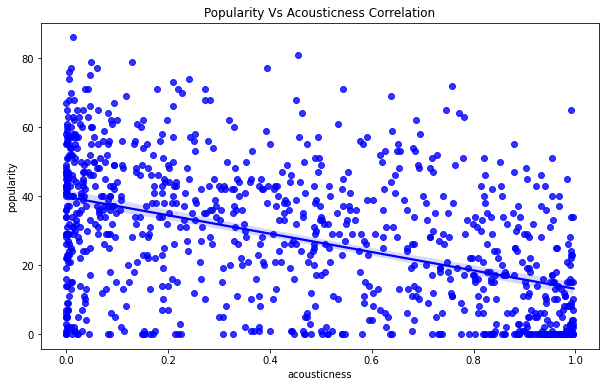

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y='popularity', x='acousticness', color='b').set(title = 'Popularity Vs Acousticness Correlation')

In [19]:
df_tracks['dates']=df_tracks.index.get_level_values('release_date')
df_tracks.dates=pd.to_datetime(df_tracks.dates)
years=df_tracks.dates.dt.year

In [20]:
df_tracks.dates.head()

release_date
1922-02-22   1922-02-22
1922-06-01   1922-06-01
1922-03-21   1922-03-21
1922-03-21   1922-03-21
1922-01-01   1922-01-01
Name: dates, dtype: datetime64[ns]

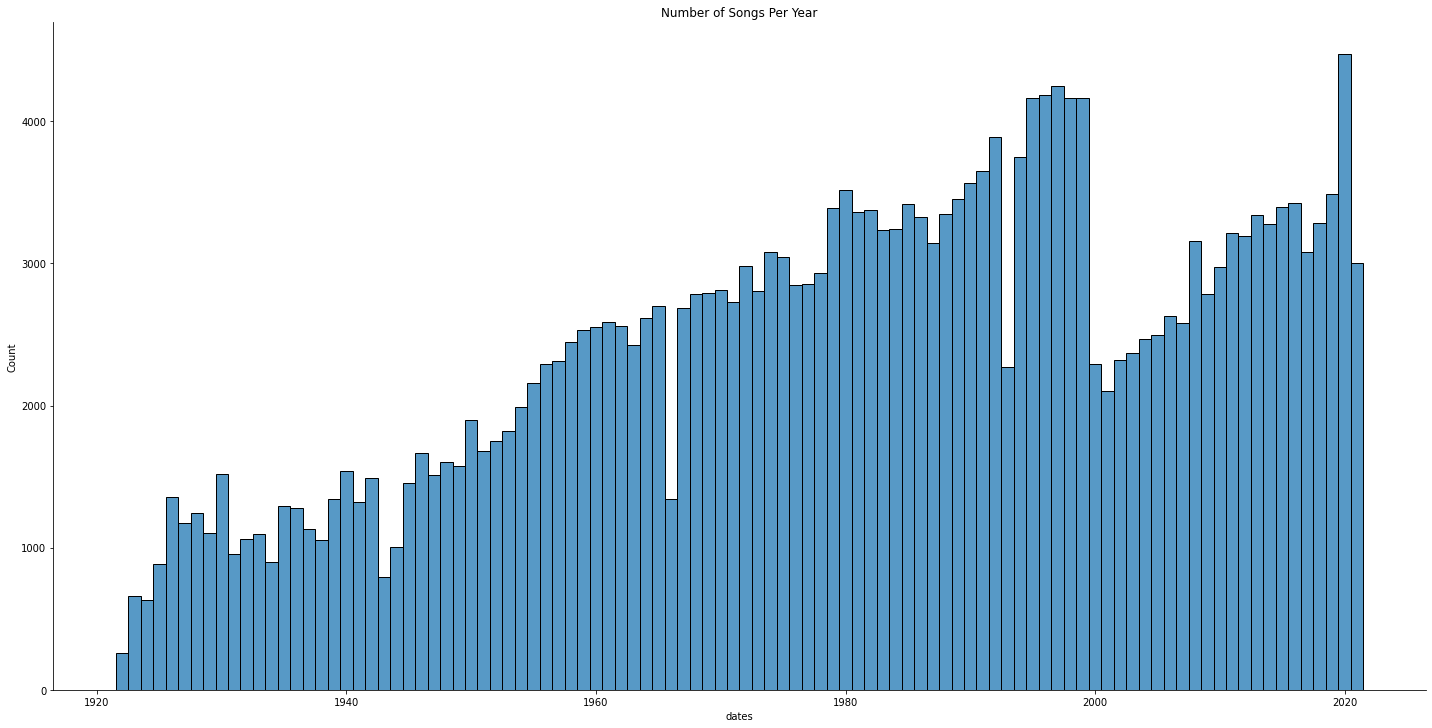

In [21]:
sns.displot(years, discrete=True, aspect=2, height=10, kind='hist').set(title='Number of Songs Per Year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

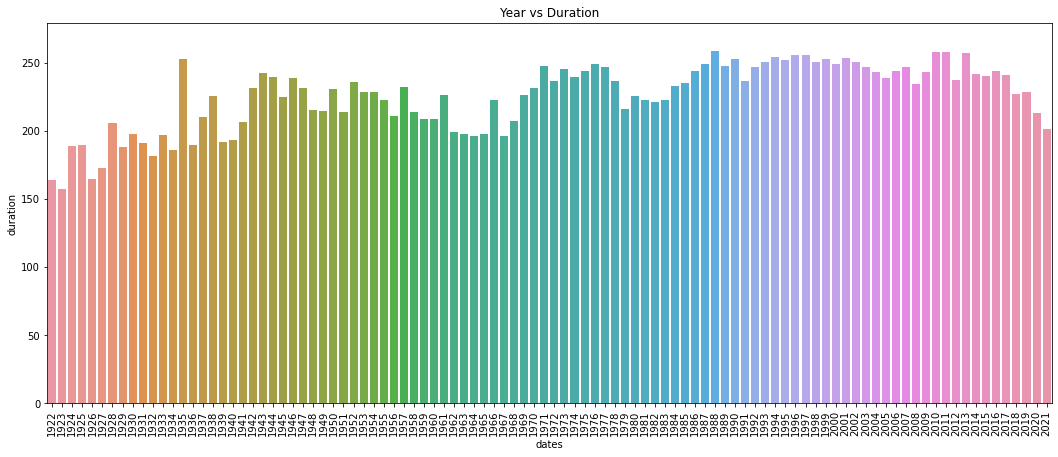

In [22]:
# duration of songs over the years

total_dr =  df_tracks.duration
fig_dims = (18,7)
fig, ax=plt.subplots(figsize=fig_dims)
fig= sns.barplot(x=years, y = total_dr, ax=ax, errwidth=False).set(title="Year vs Duration")
plt.xticks(rotation=90)

In [27]:
# # Average duration of the songs over the years

# total_dr =  df_tracks.duration
# sns.set_style(style='whitegrid')
# fig_dims = (10,5)
# fig, ax=plt.subplots(figsize=fig_dims)
# fig= sns.lineplot(x=years, y = total_dr, ax=ax).set(title="Year vs Duration")
# plt.xticks(rotation=60)

In [29]:
df_genre=pd.read_csv('SpotifyFeatures.csv')
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Text(0, 0.5, 'Genres')

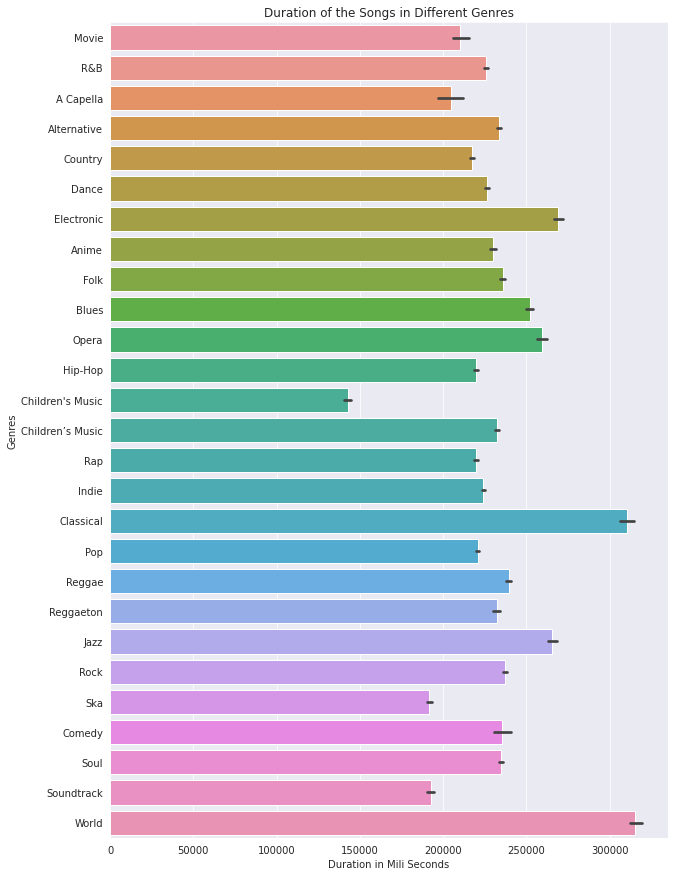

In [47]:
#plt.title("Duration of the Songs in Different Genres")
plt.figure(figsize=(10,15))
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=df_genre).set(title='Duration of the Songs in Different Genres')
plt.xlabel("Duration in Mili Seconds")
plt.ylabel("Genres")

[Text(0.5, 1.0, 'Top 5 Genre by Popularity')]

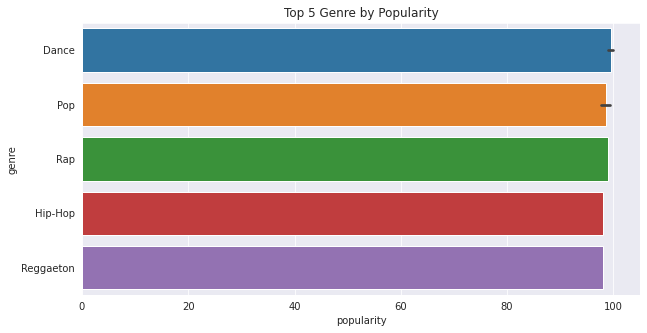

In [46]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous = df_genre.sort_values('popularity', ascending=False).head(10)
sns.barplot(y='genre', x='popularity', data=famous).set(title='Top 5 Genre by Popularity')